# **Read and Data Preparation**

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding = "latin1")
metadata = pd.read_csv('DescriptionDataCoSupplyChain.csv', encoding = "latin1")

df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.000000,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,S

In [4]:
metadata

,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased...
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer
5,Delivery Status,: Delivery status of orders: Advance shipping...
6,Late_delivery_risk,: Categorical variable that indicates if send...
7,Category Id,: Product category code
8,Category Name,: Description of the product category
9,Customer City,: City where the customer made the purchase


## Data Info and Describe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,-84.915675,6691.379495,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,21.433241,4162.918106,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025986,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,-98.446312,3258.500000,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,-76.847908,6457.000000,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,-66.370583,9779.000000,54144.000000,1004.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263077,20757.000000,77204.000000,1363.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


## Missing Value Check

In [7]:
def check_missing_values(df, print_results=True):
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100

    missing_df = pd.DataFrame({
        'Column': df.columns,
        'Missing_Values': missing_values.values,
        'Missing_Percent': missing_percent.values
    })

    missing_df = missing_df.sort_values('Missing_Percent', ascending=False)
    
    if print_results:
        print("\n=== Missing Values Analysis ===")
        print(f"Total rows in dataset: {len(df)}")
        print("\nMissing values per column:")
        print(missing_df.to_string(index=False))
        
        # Summary
        print("\nSummary:")
        print(f"Columns with missing values: {len(missing_df[missing_df['Missing_Values'] > 0])}/{len(df.columns)}")
        print(f"Columns completely missing: {len(missing_df[missing_df['Missing_Percent'] == 100])}")
        print(f"Most missing column: '{missing_df.iloc[0]['Column']}' with {missing_df.iloc[0]['Missing_Percent']:.2f}% missing")
    
    return missing_df

missing_val = check_missing_values(df)


=== Missing Values Analysis ===
Total rows in dataset: 180519

Missing values per column:
                       Column  Missing_Values  Missing_Percent
          Product Description          180519       100.000000
                Order Zipcode          155679        86.239676
               Customer Lname               8         0.004432
             Customer Zipcode               3         0.001662
                         Type               0         0.000000
       Order Profit Per Order               0         0.000000
       Order Item Cardprod Id               0         0.000000
          Order Item Discount               0         0.000000
     Order Item Discount Rate               0         0.000000
                Order Item Id               0         0.000000
     Order Item Product Price               0         0.000000
      Order Item Profit Ratio               0         0.000000
          Order Item Quantity               0         0.000000
                        Sal

## Duplicate Check

In [8]:
# Duplicate data
duplicate = df.duplicated()
duplicate.unique()

array([False])

## Data Preparation

In [9]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.000000,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,S

In [ ]:
# Relevant Columns
dt = df[['Shipping Mode',
         'Days for shipment (scheduled)',
         'Order Item Quantity',
         'Order Item Product Price',
         'order date (DateOrders)',
         'Order Item Discount',
         'Order Item Discount Rate',
         'Order Item Profit Ratio',         
         'Sales',
         'Customer Segment',
         'Order Region',
         'Order Item Total',
         'shipping date (DateOrders)',
         'Late_delivery_risk'
         ]]
dt

,Shipping Mode,Days for shipment (scheduled),Order Item Quantity,Order Item Product Price,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Sales,Customer Segment,Order Region,Order Item Total,shipping date (DateOrders),Late_delivery_risk
0,Standard Class,4,1,327.750000,1/31/2018 22:56,13.110000,0.04,0.29,327.750000,Consumer,Southeast Asia,314.640015,2/3/2018 22:56,0
1,Standard Class,4,1,327.750000,1/13/2018 12:27,16.389999,0.05,-0.80,327.750000,Consumer,South Asia,311.359985,1/18/2018 12:27,1
2,Standard Class,4,1,327.750000,1/13/2018 12:06,18.030001,0.06,-0.80,327.750000,Consumer,South Asia,309.720001,1/17/2018 12:06,0
3,Standard Class,4,1,327.750000,1/13/2018 11:45,22.940001,0.07,0.08,327.750000,Home Office,Oceania,304.809998,1/16/2018 11:45,0
4,Standard Class,4,1,327.750000,1/13/2018 11:24,29.500000,0.09,0.45,327.750000,Corporate,Oceania,298.250000,1/15/2018 11:24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,Standard Class,4,1,399.980011,1/16/2016 3:40,0.000000,0.00,0.10,399.980011,Home Office,Eastern Asia,399.980011,1/20/2016 3:40,0
180515,Second Class,2,1,399.980011,1/16/2016 1:34,4.000000,0.01,-1.55,399.980011,Corporate,Eastern Asia,395.980011,1/19/2016 1:34,1
180516,Standard Class,4,1,399.980011,1/15/2016 21:00,8.000000,0.02,0.36,399.980011,Corporate,Oceania,391.980011,1/20/2016 21:00,1
180517,Standard Class,4,1,399.980011,1/15/2016 20:18,12.000000,0.03,0.48,399.980011,Consumer,Oceania,387.980011,1/18/2016 20:18,0


# **Exploratory Data Analysis**

## Categorical Summary

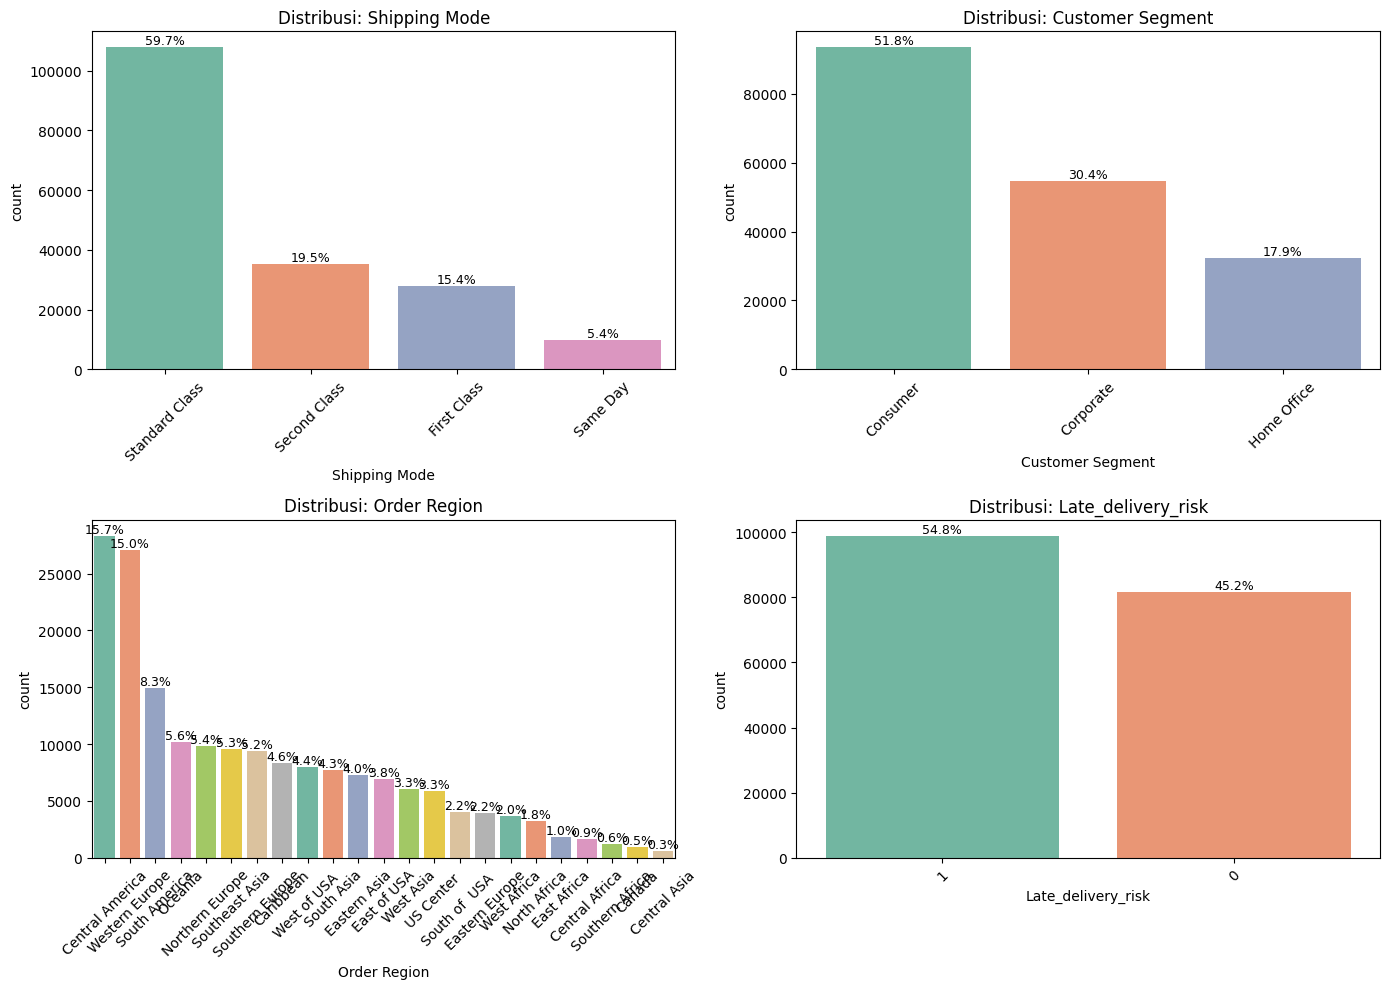

In [11]:
# Categorical Summary

categorical = ['Shipping Mode', 'Customer Segment', 'Order Region', 'Late_delivery_risk']

plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical, 1):
    plt.subplot(2, 2, i)  
    
    ax = sns.countplot(data = dt, x = col, palette = "Set2", order = dt[col].value_counts().index)
    plt.title(f'Distribusi: {col}')
    plt.xticks(rotation=45)
    for p in ax.patches:
        count = int(p.get_height())
        percentage = count / len(dt) * 100
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()

**1. Distribusi: Shipping Mode**<br>
a. Standard Class mendominasi pengiriman dengan 59.7%<br>
b. Diikuti oleh Second Class (19.5%) dan First Class (15.4%)<br>
c. Same Day hanya 5.4% <br>
Dari gambar di atas diperoleh insight bahwa mayoritas pengiriman dilakukan dengan Standard Class. Hal ini berarti pelanggan lebih prefer opsi murah/standar dibanding cepat (same-day). Ini bisa berpengaruh ke risiko keterlambatan pengiriman juga (karena waktu pengiriman lebih panjang).<br>
<br>

**2. Distribusi: Customer Segment**<br>
a. Consumer paling dominan (51.8%)<br>
b. Corporate menyumbang 30.4%<br>
c. Home Office paling sedikit (17.9%)<br>
Sebagian besar pesanan datang dari individual consumer, bukan perusahaan. Segmentasi ini penting kalau kamu mau bikin model prediksi atau strategi pengiriman berbeda untuk tiap segmen.<br>
<br>

**3. Distribusi Order Region**<br>
a. Top 3 wilayah, yaitu Central America (15.7%), West Africa (15.0%), South America (8.3%)<br>
b. Wilayah lain menyebar dan menurun drastis, banyak yang <5%<br>
c. Ada juga wilayah minor seperti Central Asia (0.3%)<br>
Ada ketimpangan distribusi wilayah, dengan sebagian besar pesanan datang dari wilayah tertentu. Perlu dicek apakah wilayah dengan volume besar juga punya tingkat keterlambatan tinggi atau tidak — cocok untuk segmentasi geografis dalam model.<br>
<br>

**4. Distribusi Late Delivery Risk**<br>
a. 54.8% order dianggap berisiko terlambat (1)<br>
b. 45.2% tidak (0)<br>
Data target (Late_delivery_risk) relatif seimbang, meskipun agak dominan di kelas positif (terlambat). Ini cukup baik karena tidak perlu penanganan ekstrem terhadap imbalance, meski sedikit teknik balancing seperti undersampling/weighting bisa membantu saat modeling.

## Univariate Analysis

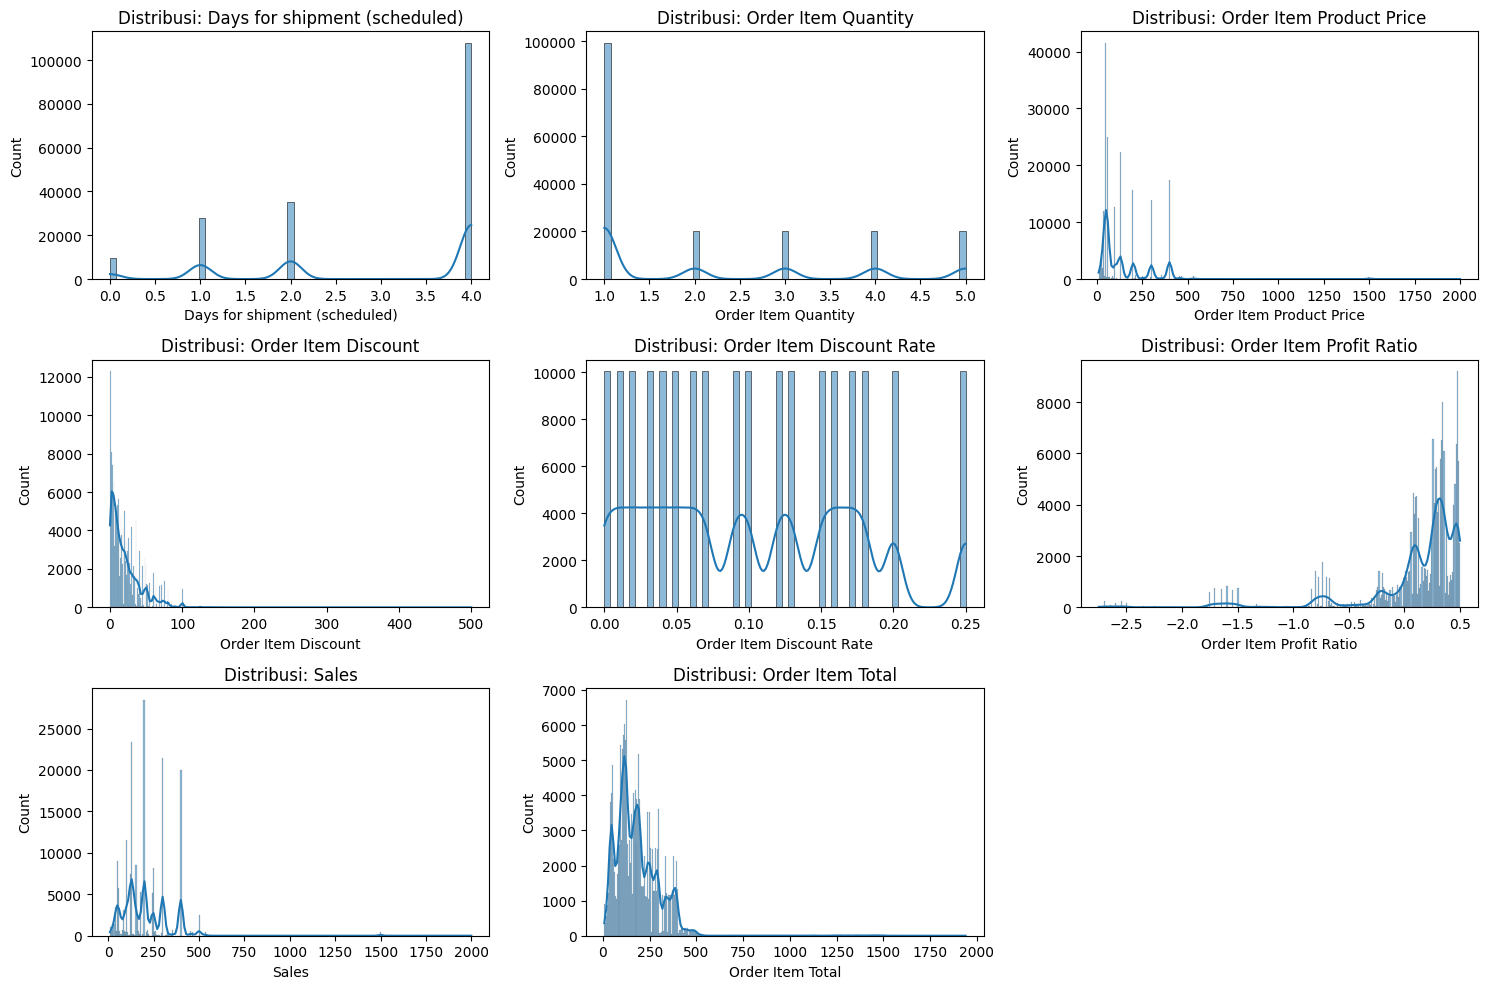

In [12]:
# Numerical Columns

numerical = [
    'Days for shipment (scheduled)', 'Order Item Quantity', 'Order Item Product Price',
    'Order Item Discount', 'Order Item Discount Rate', 'Order Item Profit Ratio',
    'Sales', 'Order Item Total'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical, 1):
    plt.subplot(3, 3, i)
    sns.histplot(dt[col], kde=True)
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

**1. Distribusi: Days for Shipment (scheduled)**<br>
Distribusi sangat diskrit, dengan mayoritas nilai di angka bulat seperti 0, 1, 2, 3, dan puncaknya di 4 hari.<br>
Kolom ini menunjukkan bahwa sebagian besar produk dijadwalkan untuk dikirim dalam waktu maksimal 4 hari, dengan distribusi yang sangat tidak merata. Nilai-nilai ini mencerminkan kebijakan logistik yang tampaknya terstandarisasi. Karena hanya memiliki sedikit nilai unik, fitur ini lebih cocok diperlakukan sebagai ordinal kategori dibanding numerik kontinu dalam beberapa model.<br>
<br>

**2. Distribusi: Order Item Quantity**<br>
Distribusi diskrit kuat. Nilai 1 mendominasi, lalu ada puncak kecil di 2–5.<br>
Mayoritas pesanan terdiri dari satu item produk, menandakan bahwa pembelian bersifat eceran atau individual. Distribusi ini left-skewed, yang berarti kuantitas besar sangat jarang terjadi. Dalam modeling, distribusi seperti ini dapat menimbulkan bias terhadap nilai rendah, sehingga bisa dipertimbangkan untuk dibinning (1, 2–3, >3) atau disesuaikan menggunakan transformasi diskrit.<br>
<br>

**3. Distribusi: Order Item Product Price**<br>
Distribusi sangat right-skewed. Banyak produk berharga murah, tapi ada outlier ekstrem >1000.<br>
Harga produk menunjukkan sebaran luas, tetapi mayoritas produk memiliki harga < 200. Skewness tinggi dan outlier menunjukkan perlunya transformasi (misalnya log1p) untuk menyeimbangkan pengaruh harga tinggi terhadap model. Outlier ini bisa berasal dari produk premium dan perlu dianalisis lebih lanjut apakah berdampak signifikan terhadap profit/risk.<br>
<br>

**4. Distribusi: Order Item Discount**<br>
Distribusi sangat miring ke kanan (right-skewed), dengan banyak order tanpa diskon atau diskon kecil. Ada lonjakan outlier hingga 500.<br>
Kolom ini menunjukkan bahwa sebagian besar pesanan mendapatkan diskon kecil atau tidak ada sama sekali, tapi ada sejumlah kecil kasus dengan diskon besar (bahkan ekstrem). Ini bisa menunjukkan promosi khusus, clearance, atau kesalahan input. Transformasi log dapat membantu model memahami variasi ini tanpa outlier mendominasi.<br>
<br>

**5. Distribusi: Order Item Discount Rate**<br>
Distribusi berbentuk batang-batang diskrit, dengan puncak di nilai-nilai spesifik seperti 0.05, 0.1, 0.15, 0.2, 0.25.<br>
Karena diskon diberikan berdasarkan tier atau paket promosi tetap, kolom ini lebih cocok dianggap sebagai kategori terdiskretisasi ketimbang fitur kontinu. Skewness tidak terlalu jadi masalah di sini, tapi bisa dipertimbangkan untuk di-one-hot jika dipakai di model sensitif.<br>
<br>

**6. Distribusi: Item Profit Ratio**<br>
Distribusinya sangat asimetris ke kiri, dengan banyak nilai negatif. Sebagian kecil berada di dekat 0 hingga positif.<br>
Ini metrik penting karena menunjukkan margin keuntungan tiap produk. Skewness ke kiri menandakan banyak produk dijual rugi atau dengan margin kecil. Karena banyak nilai negatif ekstrem, log transform tidak langsung bisa digunakan. Log-shift + RobustScaler bisa bantu menstabilkan sebaran untuk model prediksi atau regresi profit.<br>
<br>

**7. Distribusi: Sales**<br>
Distribusi mirip dengan product price, right-skewed parah, banyak sales < 250, dan beberapa outlier > 1000.<br>
Kolom ini mengandung informasi penting untuk ukuran transaksi. Skewness tinggi menunjukkan perlu transformasi log agar tidak ada transaksi besar yang terlalu dominan. Data ini juga bisa digunakan untuk segmentasi pelanggan berdasarkan ukuran transaksi.<br>
<br>

**8. Order Item Total**<br>
Distribusi mirip dengan sales dan price. Right-skewed, rentang nilai cukup luas.<br>
Distribusi miring ke kanan menandakan pola belanja kecil umum, sementara transaksi besar jarang. Karena sangat terkait dengan fitur lain (kolinear), perlu diperhatikan dalam modeling agar tidak menimbulkan multikolinearitas.<br>

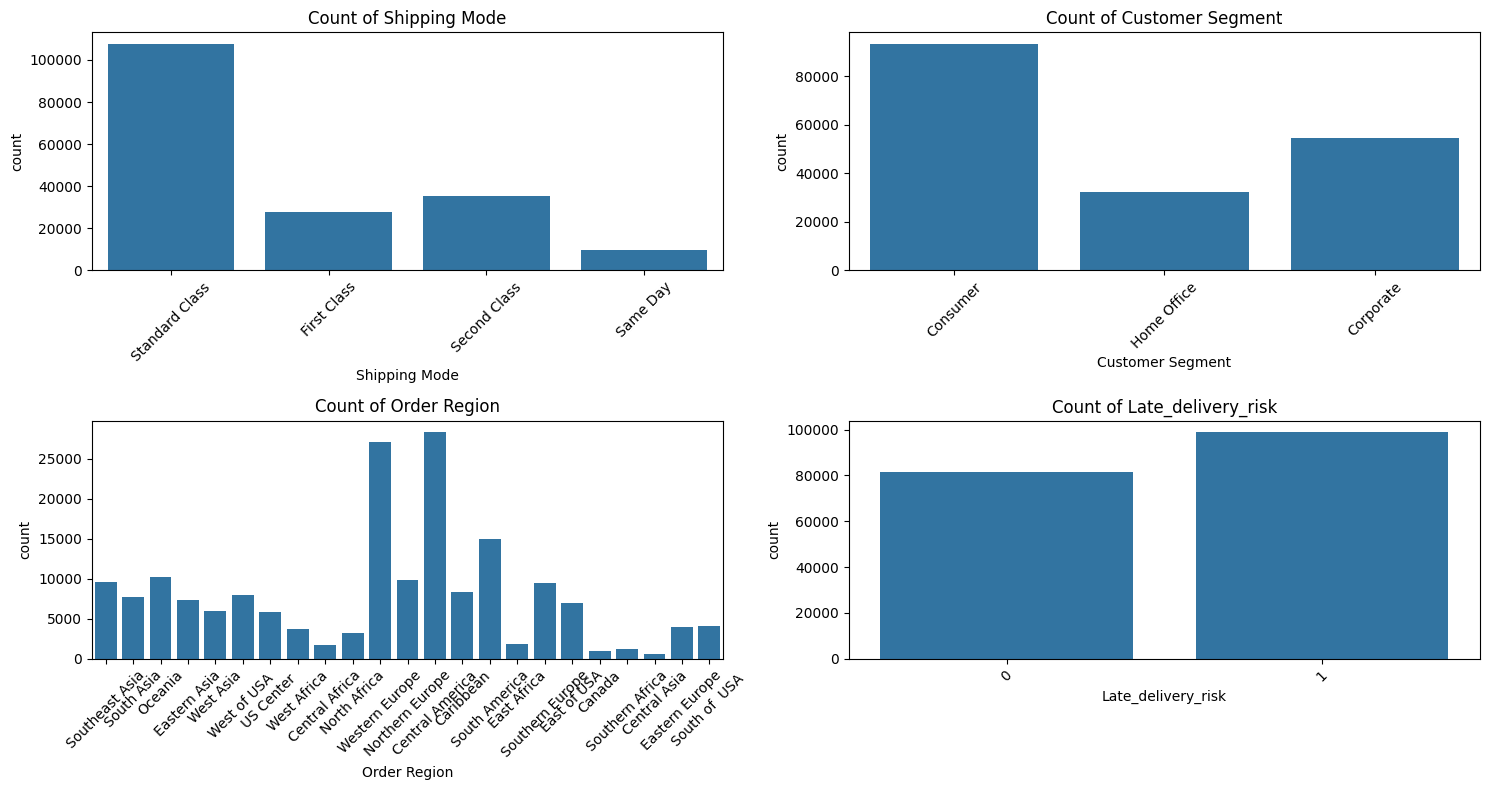

In [13]:
# Categorical Columns
categorical_cols = ['Shipping Mode', 'Customer Segment', 'Order Region', 'Late_delivery_risk']

plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=dt, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**1. Count of Shipping Mode:**<br>
a. Dominasi Standard Class (sekitar 100,000) menunjukkan preferensi utama pelanggan terhadap opsi pengiriman yang lebih lambat namun murah. Opsi seperti First Class, Second Class, dan Same Day jauh lebih sedikit digunakan, yang mungkin mengindikasikan biaya tinggi atau kebutuhan mendesak yang jarang.<br>
b. Perusahaan bisa fokus mengoptimalkan layanan Standard Class untuk efisiensi biaya, sambil mempertimbangkan promosi untuk opsi cepat jika ada permintaan khusus.
<br>

**2. Count of Customer Segment:**<br>
a. Segmen Consumer (80,000-90,000) jauh lebih besar dibanding Home Office dan Corporate (40,000-60,000), menunjukkan mayoritas pelanggan adalah individu, bukan bisnis.<br>
b. Strategi pemasaran bisa lebih ditargetkan ke konsumen individu, misalnya dengan penawaran personal atau produk yang sesuai kebutuhan rumah tangga.
<br>

**3. Count of Order Region:**<br>
a. US CA (California) memiliki jumlah pesanan tertinggi (20,000-25,000), sementara wilayah lain seperti Central Africa sangat minim (<5,000). Ini menunjukkan konsentrasi pasar di wilayah tertentu, terutama AS.<br>
b. Perusahaan bisa meningkatkan logistik dan distribusi di wilayah seperti US CA, sambil mengevaluasi ekspansi atau strategi khusus untuk wilayah dengan volume rendah.
<br>

**4. Count of Late_delivery_risk:**<br>
a. Risiko keterlambatan (1) lebih sering terjadi (80,000-90,000) dibanding tanpa risiko (0, 60,000-70,000), menunjukkan masalah pengiriman yang signifikan.<br>
b. Perlu analisis mendalam untuk mengidentifikasi penyebab keterlambatan (misalnya, wilayah tertentu atau mode pengiriman) dan perbaikan proses logistik, seperti meningkatkan kapasitas di Standard Class atau wilayah rawan seperti US CA.
<br>

Dapat disimpulkan bahwa fokus pasar ada pada Consumer di US CA dengan Standard Class, tapi risiko keterlambatan tinggi menunjukkan adanya kelemahan operasional. Perusahaan bisa memprioritaskan efisiensi pengiriman dan analisis data lebih lanjut untuk mengurangi risiko tersebut.

## Date Columns

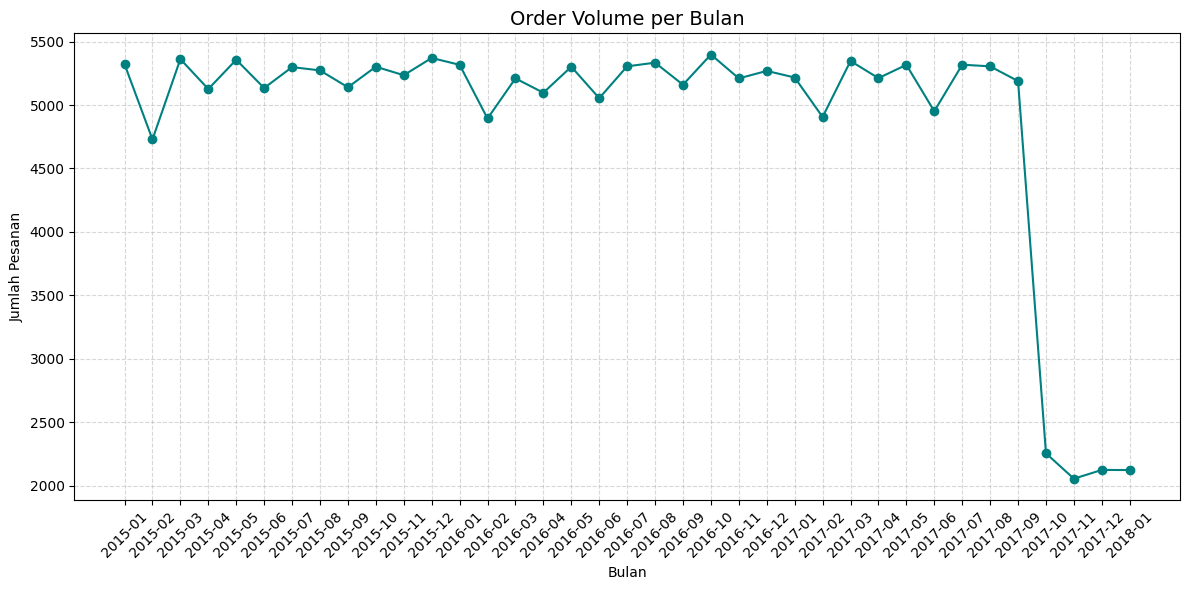

In [14]:
# Convert to Date
dt['order date (DateOrders)'] = pd.to_datetime(dt['order date (DateOrders)'])

# Hitung jumlah order per bulan
monthly_orders = dt['order date (DateOrders)'].dt.to_period('M').value_counts().sort_index()
monthly_orders.index = monthly_orders.index.astype(str)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders.index, monthly_orders.values, marker='o', linestyle='-', color='teal')
plt.title('Order Volume per Bulan', fontsize=14)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Dari grafik di atas diperoleh insight sebagai berikut**. <br>
- Dari awal 2015 hingga Agustus 2017, jumlah pesanan stabil tinggi, berkisar antara 4900–5400 order/bulan.
- Setelah Agustus 2017, terjadi penurunan drastis ke sekitar 2100–2300 order/bulan, dan angka ini berlangsung konsisten hingga akhir data di Januari 2018.

<br>
Terjadi penurunan volume pesanan hampir 60% dari bulan Agustus ke September 2017.
Ini sangat mencolok dan bisa menandakan:<br>
a. Perubahan operasional<br>
b. Masalah internal<br>
c. Perubahan strategi bisnis

## Bivariate Analysis

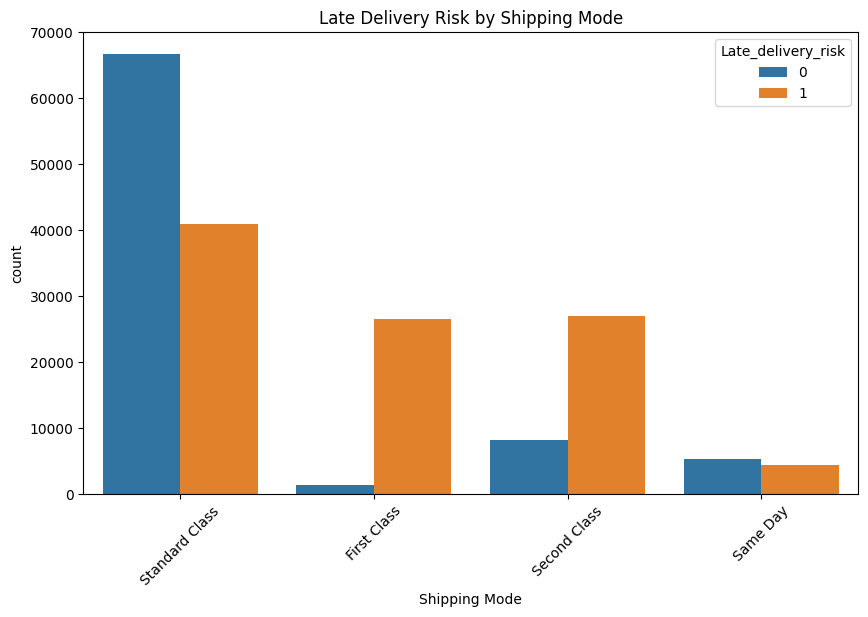

In [15]:
# Late_delivery_risk vs Shipping Mode
plt.figure(figsize=(10, 6))
sns.countplot(data=dt, x='Shipping Mode', hue='Late_delivery_risk')
plt.title('Late Delivery Risk by Shipping Mode')
plt.xticks(rotation=45)
plt.show()

**Insight per Shipping**<br>
**1. Standard Class<br>**
a. Volume order paling tinggi di antara class yang lain.<br>
b. Cukup seimbang antara yang tepat waktu dan yang terlambat (walaupun sedikit lebih banyak yang tidak terlambat).<br>
<br>

**2. First Class**<br>
a. Hampir seluruh order menggunakan First Class berakhir terlambat.<br>
b. Sangat jarang pengiriman tepat waktu di mode ini.<br>
<br>

**3. Second Class**<br>
a. Sama seperti First Class: mayoritas besar pesanan berisiko terlambat.<br>
b. Rasio antara terlambat dan tidak terlambat sangat timpang.
<br>

**4. Same Day**<br>
a. Volume order paling rendah. <br>
b. Cenderung seimbang antara terlambat dan tidak, meskipun tidak terlalu banyak datanya.<br>
<br>

In [16]:
# Discount vs Product Price
dt[['Order Item Product Price', 'Order Item Discount']].sort_values(by='Order Item Discount', ascending=False).head(10)

,Order Item Product Price,Order Item Discount
12606,1999.98999,500.0
59847,1999.98999,400.0
123298,1500.00000,375.0
120292,1500.00000,375.0
120294,1500.00000,375.0
82082,1500.00000,375.0
82079,1500.00000,375.0
45116,1500.00000,375.0
45115,1500.00000,375.0
50314,1500.00000,375.0


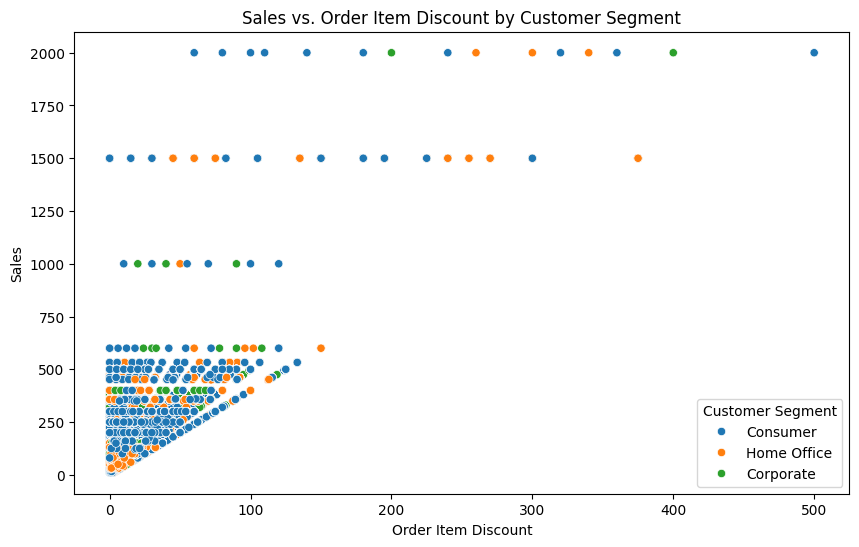

In [17]:
# Sales vs Order Item Discount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dt, x='Order Item Discount', y='Sales', hue='Customer Segment')
plt.title('Sales vs. Order Item Discount by Customer Segment')
plt.show()

**Insight yang diperoleh adalah sebagai berikut.**<br>
<br>

**1. Korelasi Diskon dan Penjualan Tidak Linear**<br>
Terdapat 2 cluster besar, yaitu cluster segitiga yang berada di bawah 600 pada sumbu Y dengan diskon di bawah 100 dan cluster titik-titik terpencar dengan diskon tinggi 500 dan sales tinggi.<br>
Hal ini menunjukkan bahwa mayoritas transaksi berada pada diskon rendah dan sales sedang, sedangkan transaksi dengan diskon tinggi jumlahnya sedikit tapi menghasilkan sales besar.
<br>

**2. Segmen Consumer Mendominasi**<br>
Titik biru (Consumer) dominan di seluruh rentang diskon dan sales. Hal ini menunjukkan Consumer adalah target pasar utama dan kontributor terbesar revenue.
<br>

**3. Home Office dan Corporate Terlihat Konsisten**
Kedua segmen ini (orange dan hijau) juga menyebar di area diskon rendah hingga sedang. Namun kontribusi mereka terhadap penjualan besar (sales > 1000) tidak sebanyak Consumer.
<br>

**4. Outlier Diskon Tinggi**<br>
Ada beberapa titik dengan diskon lebih dari 300–500, yang tetap menghasilkan sales besar. Namun, jumlah titik ini sangat kecil, mengindikasikan bahwa diskon besar hanya diberikan pada segelintir item bernilai tinggi.

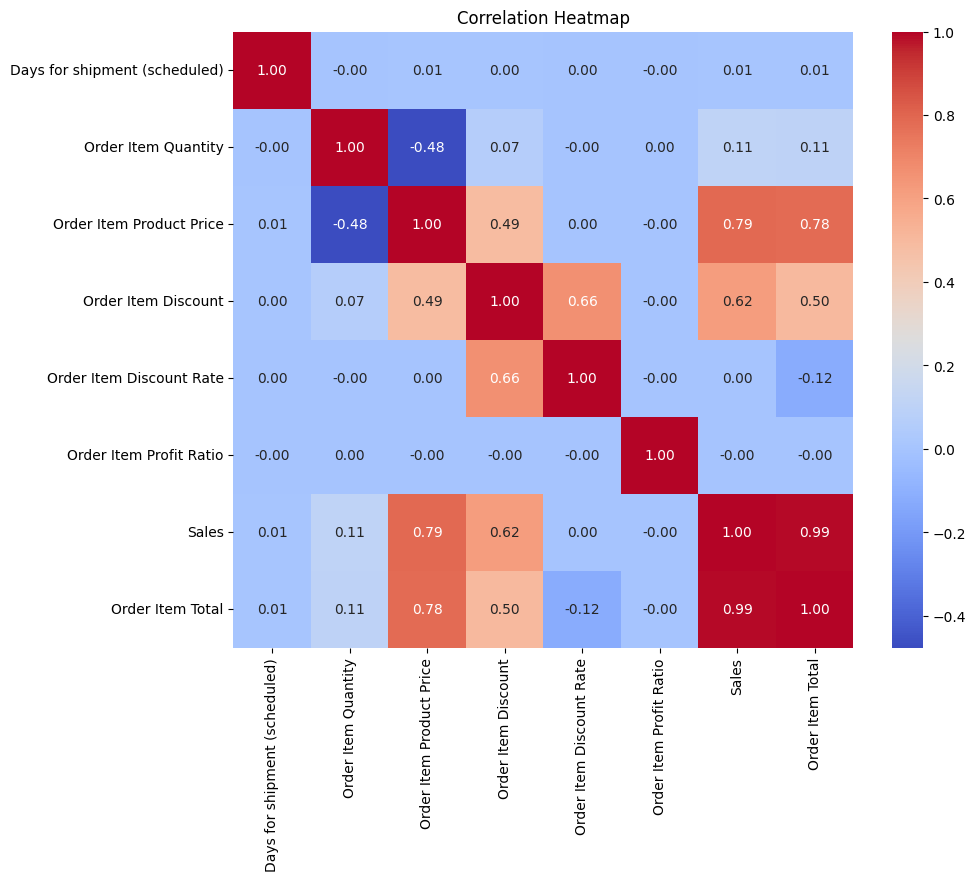

In [18]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dt[numerical].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

- Korelasi sangat kuat antara Sales dan Product Price, artinya menjual produk mahal itu penting, tapi juga harus memperhatikan margin (karena Profit Ratio tidak berkorelasi).

- Days for shipment yang tidak berkorelasi menunjukkan bahwa kecepatan pengiriman bukan faktor numerik dominan, tetapi bisa berpengaruh pada Late_delivery_risk, yang belum tercakup di sini karena kategorikal.

- Korelasi negatif antara Quantity dan Price mendukung praktik diskon kuantitas. Bisa dimanfaatkan untuk melakukan promosi.

## Outlier Check

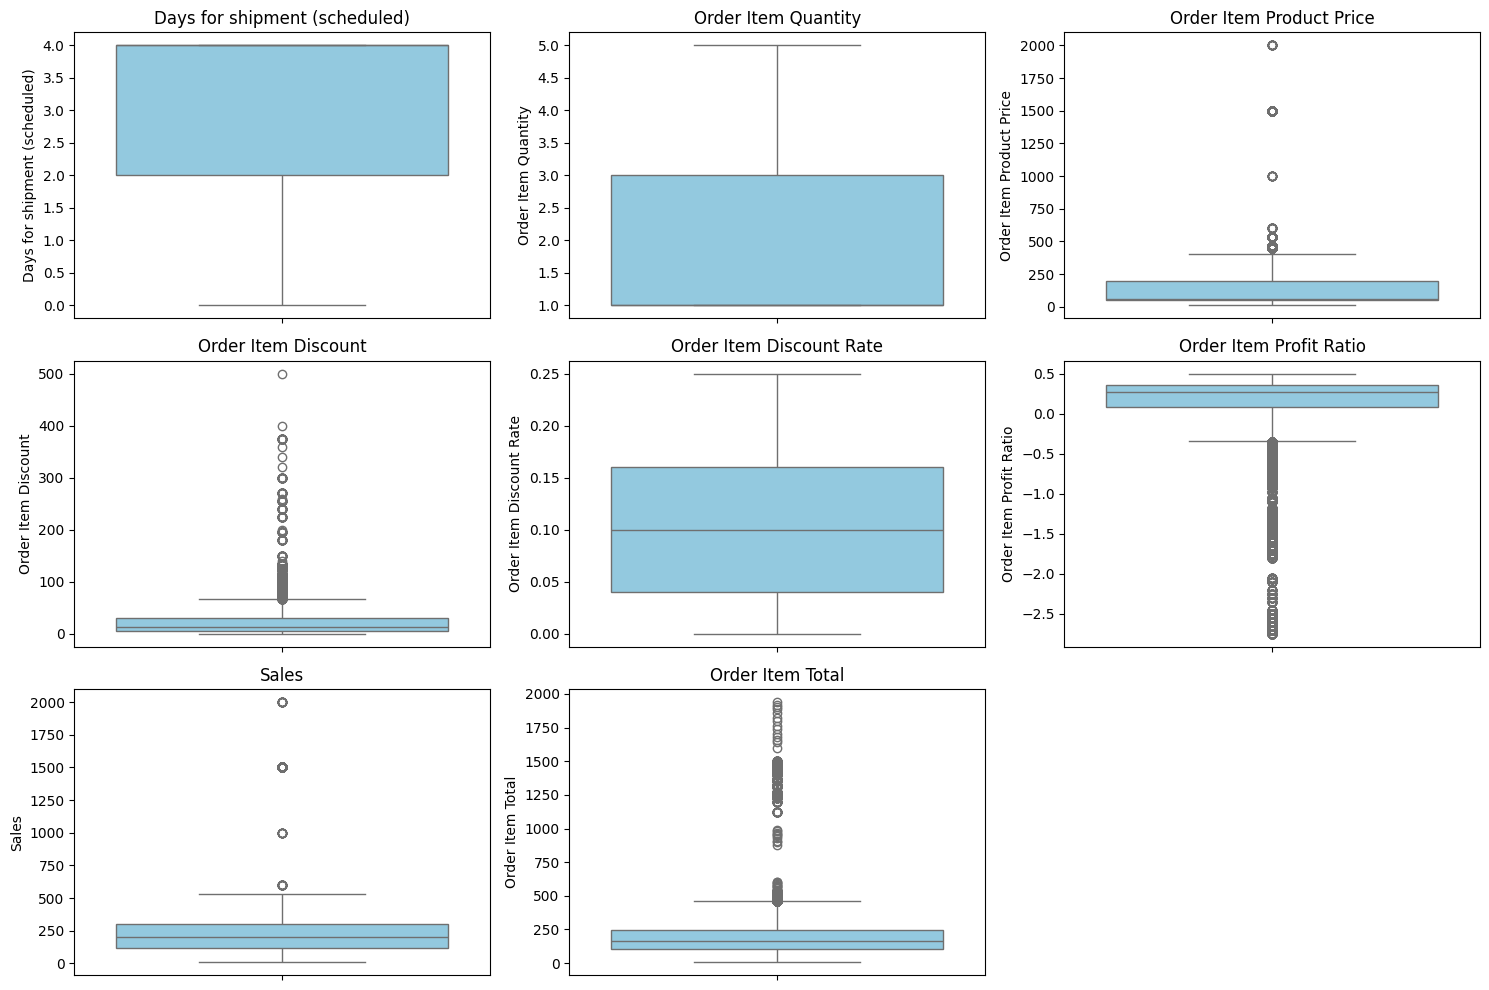

In [19]:
# Boxplot for Outlier Check
plt.figure(figsize = (15, 10))
for i, col in enumerate(numerical, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y = dt[col], color = 'skyblue')
    plt.title(col)
    plt.tight_layout()
plt.show()

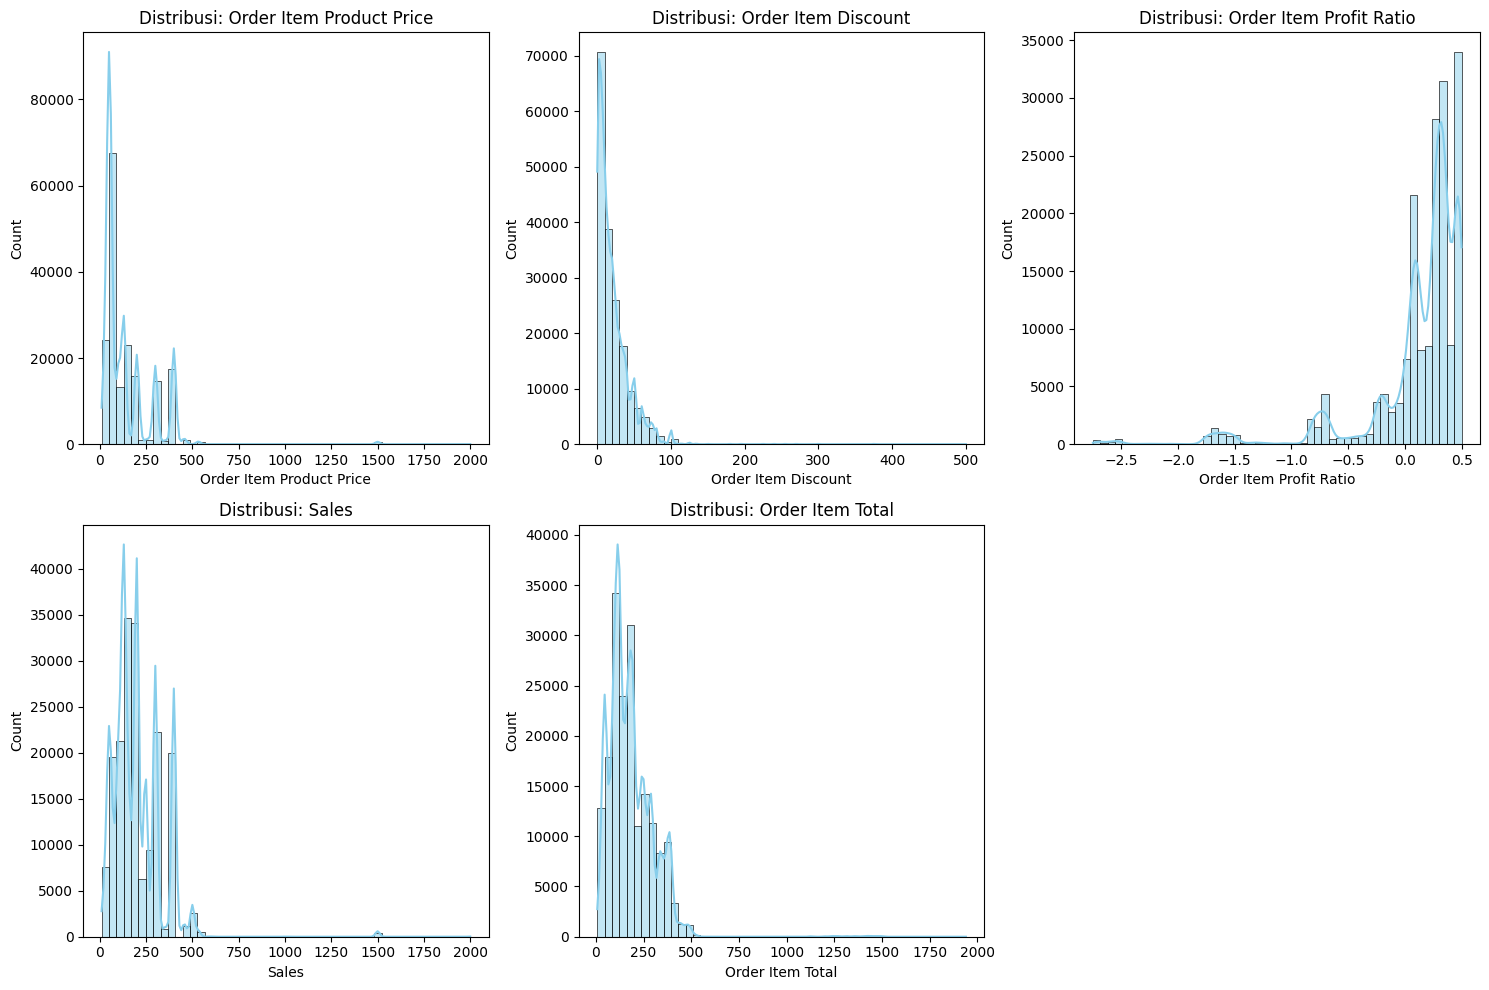

In [20]:
cols_to_check = ['Order Item Product Price', 'Order Item Discount', 'Order Item Profit Ratio', 'Sales', 'Order Item Total']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_check, 1):
    plt.subplot(2, 3, i)
    sns.histplot(dt[col], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [21]:
for col in cols_to_check:
    s = skew(dt[col])
    k = kurtosis(dt[col])
    print(f"{col}: skewness = {s:.2f}, kurtosis = {k:.2f}")

Order Item Product Price: skewness = 3.19, kurtosis = 23.31
Order Item Discount: skewness = 3.04, kurtosis = 25.23
Order Item Profit Ratio: skewness = -2.89, kurtosis = 10.16
Sales: skewness = 2.88, kurtosis = 23.94
Order Item Total: skewness = 2.89, kurtosis = 23.92


# **Preprocessing Data**

## Extract Date

In [22]:
dt

,Shipping Mode,Days for shipment (scheduled),Order Item Quantity,Order Item Product Price,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Sales,Customer Segment,Order Region,Order Item Total,shipping date (DateOrders),Late_delivery_risk
0,Standard Class,4,1,327.750000,2018-01-31 22:56:00,13.110000,0.04,0.29,327.750000,Consumer,Southeast Asia,314.640015,2/3/2018 22:56,0
1,Standard Class,4,1,327.750000,2018-01-13 12:27:00,16.389999,0.05,-0.80,327.750000,Consumer,South Asia,311.359985,1/18/2018 12:27,1
2,Standard Class,4,1,327.750000,2018-01-13 12:06:00,18.030001,0.06,-0.80,327.750000,Consumer,South Asia,309.720001,1/17/2018 12:06,0
3,Standard Class,4,1,327.750000,2018-01-13 11:45:00,22.940001,0.07,0.08,327.750000,Home Office,Oceania,304.809998,1/16/2018 11:45,0
4,Standard Class,4,1,327.750000,2018-01-13 11:24:00,29.500000,0.09,0.45,327.750000,Corporate,Oceania,298.250000,1/15/2018 11:24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,Standard Class,4,1,399.980011,2016-01-16 03:40:00,0.000000,0.00,0.10,399.980011,Home Office,Eastern Asia,399.980011,1/20/2016 3:40,0
180515,Second Class,2,1,399.980011,2016-01-16 01:34:00,4.000000,0.01,-1.55,399.980011,Corporate,Eastern Asia,395.980011,1/19/2016 1:34,1
180516,Standard Class,4,1,399.980011,2016-01-15 21:00:00,8.000000,0.02,0.36,399.980011,Corporate,Oceania,391.980011,1/20/2016 21:00,1
180517,Standard Class,4,1,399.980011,2016-01-15 20:18:00,12.000000,0.03,0.48,399.980011,Consumer,Oceania,387.980011,1/18/2016 20:18,0


In [23]:
dt['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
dt['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])

In [24]:
# Order Date
dt['order_year'] = dt['order date (DateOrders)'].dt.year
dt['order_month'] = dt['order date (DateOrders)'].dt.month
dt['order_day'] = dt['order date (DateOrders)'].dt.day
dt['order_weekday'] = dt['order date (DateOrders)'].dt.dayofweek

# Shipping Date
dt['shipping_month'] = dt['shipping date (DateOrders)'].dt.month
dt['shipping_weekday'] = dt['shipping date (DateOrders)'].dt.dayofweek

## Handle Outlier

In [25]:
# Transformation for right-skewed
dt['log_Order_Item_Product_Price'] = np.log1p(dt['Order Item Product Price'])
dt['log_Order_Item_Discount'] = np.log1p(dt['Order Item Discount'])
dt['log_Sales'] = np.log1p(dt['Sales'])
dt['log_Order_Item_Total'] = np.log1p(dt['Order Item Total'])

min_val = dt['Order Item Profit Ratio'].min()
dt['log_shifted_Profit_Ratio'] = np.log1p(dt['Order Item Profit Ratio'] - min_val + 1)

In [26]:
# Transformed Columns
transformed_cols = [
    'log_Order_Item_Product_Price',
    'log_Order_Item_Discount',
    'log_Sales',
    'log_Order_Item_Total',
    'log_shifted_Profit_Ratio'
]

print("=== Skewness & Kurtosis After Transformation ===")
for col in transformed_cols:
    s = skew(dt[col])
    k = kurtosis(dt[col])
    print(f"{col}: skewness = {s:.2f}, kurtosis = {k:.2f}")

=== Skewness & Kurtosis After Transformation ===
log_Order_Item_Product_Price: skewness = 0.33, kurtosis = -0.73
log_Order_Item_Discount: skewness = -0.52, kurtosis = -0.27
log_Sales: skewness = -0.68, kurtosis = 0.76
log_Order_Item_Total: skewness = -0.66, kurtosis = 0.73
log_shifted_Profit_Ratio: skewness = -3.73, kurtosis = 17.73


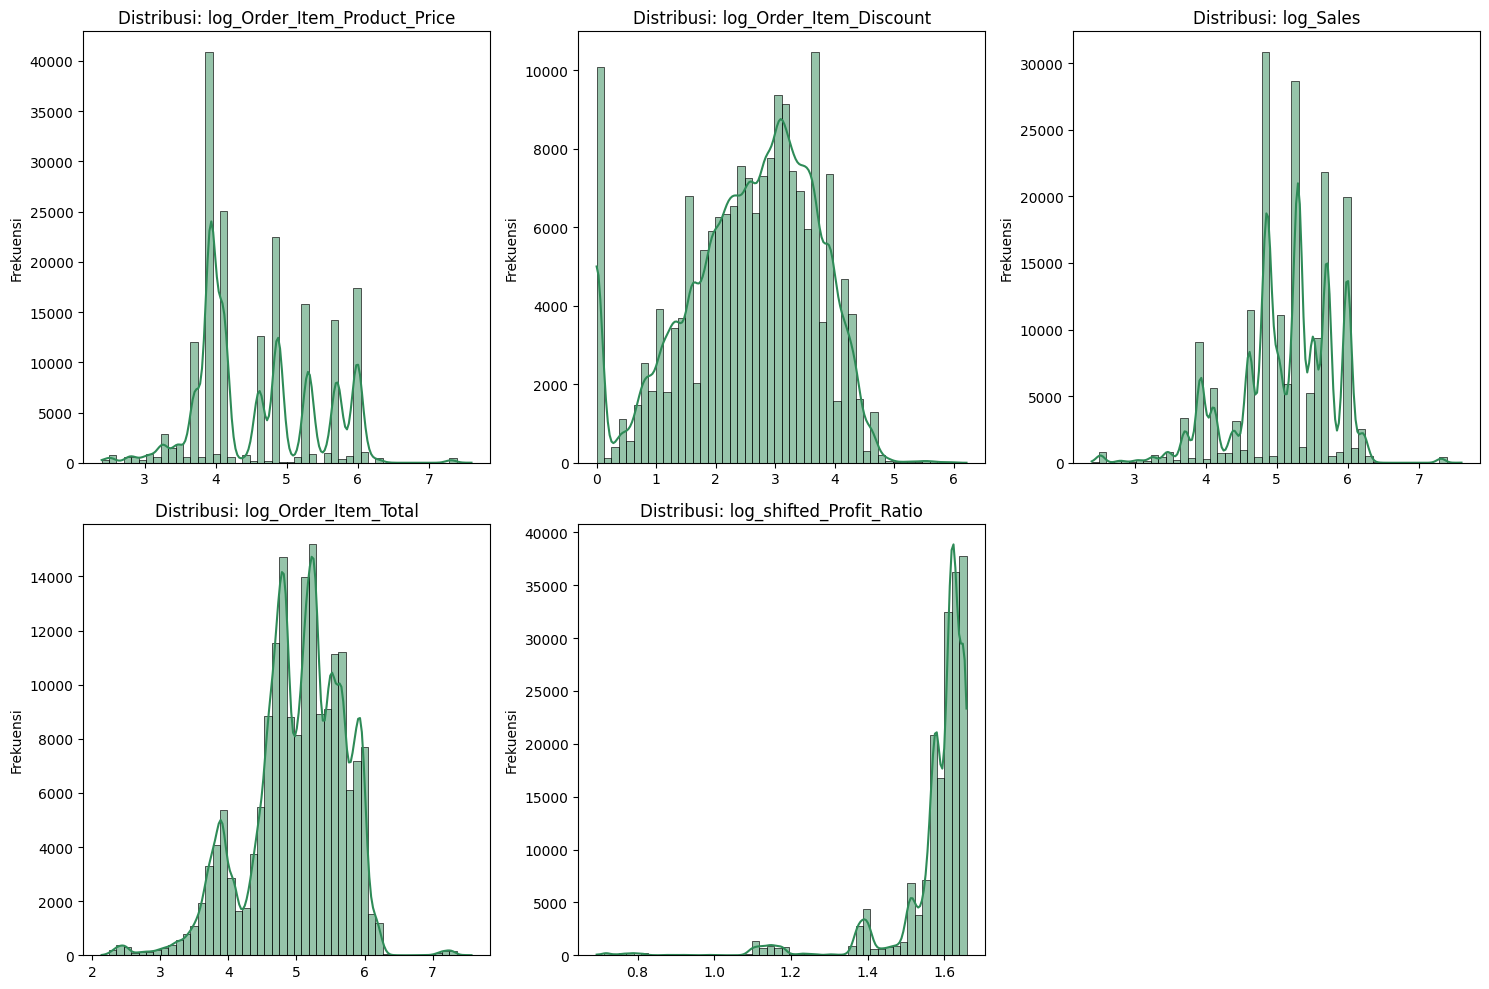

In [27]:
# Distribution After Transformation
plt.figure(figsize=(15, 10))
for i, col in enumerate(transformed_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(dt[col], bins=50, kde=True, color='seagreen')
    plt.title(f'Distribusi: {col}')
    plt.xlabel('')
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

In [28]:
# Handle Outliers for Profit Ratio
robust_scaler = RobustScaler()

# Fit-transform kolom dan simpan ke kolom baru
dt['robust_Profit_Ratio'] = robust_scaler.fit_transform(dt[['Order Item Profit Ratio']])

In [29]:
# Transformed Columns
transformed_cols = [
    'log_shifted_Profit_Ratio',
    'robust_Profit_Ratio',
]

print("=== Skewness & Kurtosis After Transformation ===")
for col in transformed_cols:
    s = skew(dt[col])
    k = kurtosis(dt[col])
    print(f"{col}: skewness = {s:.2f}, kurtosis = {k:.2f}")

=== Skewness & Kurtosis After Transformation ===
log_shifted_Profit_Ratio: skewness = -3.73, kurtosis = 17.73
robust_Profit_Ratio: skewness = -2.89, kurtosis = 10.16


## Encoding

In [30]:
# Label Encoding
col_encode = ['Shipping Mode',
              'Customer Segment',
              'Order Region']

le = LabelEncoder()

for col in col_encode:
    dt[col] = le.fit_transform(dt[col])

In [31]:
dt

,Shipping Mode,Days for shipment (scheduled),Order Item Quantity,Order Item Product Price,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Sales,Customer Segment,Order Region,Order Item Total,shipping date (DateOrders),Late_delivery_risk,order_year,order_month,order_day,order_weekday,shipping_month,shipping_weekday,log_Order_Item_Product_Price,log_Order_Item_Discount,log_Sales,log_Order_Item_Total,log_shifted_Profit_Ratio,robust_Profit_Ratio
0,3,4,1,327.750000,2018-01-31 22:56:00,13.110000,0.04,0.29,327.750000,0,15,314.640015,2018-02-03 22:56:00,0,2018,1,31,2,2,5,5.795298,2.646884,5.795298,5.754602,1.617406,0.071428
1,3,4,1,327.750000,2018-01-13 12:27:00,16.389999,0.05,-0.80,327.750000,0,13,311.359985,2018-01-18 12:27:00,1,2018,1,13,5,1,3,5.795298,2.855895,5.795298,5.744156,1.373716,-3.821428
2,3,4,1,327.750000,2018-01-13 12:06:00,18.030001,0.06,-0.80,327.750000,0,13,309.720001,2018-01-17 12:06:00,0,2018,1,13,5,1,2,5.795298,2.946017,5.795298,5.738892,1.373716,-3.821428
3,3,4,1,327.750000,2018-01-13 11:45:00,22.940001,0.07,0.08,327.750000,2,11,304.809998,2018-01-16 11:45:00,0,2018,1,13,5,1,1,5.795298,3.175551,5.795298,5.722964,1.574846,-0.678571
4,3,4,1,327.750000,2018-01-13 11:24:00,29.500000,0.09,0.45,327.750000,1,11,298.250000,2018-01-15 11:24:00,0,2018,1,13,5,1,0,5.795298,3.417727,5.795298,5.701279,1.648659,0.642857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,3,4,1,399.980011,2016-01-16 03:40:00,0.000000,0.00,0.10,399.980011,2,7,399.980011,2016-01-20 03:40:00,0,2016,1,16,5,1,2,5.993912,0.000000,5.993912,5.993912,1.578979,-0.607143
180515,2,2,1,399.980011,2016-01-16 01:34:00,4.000000,0.01,-1.55,399.980011,1,7,395.980011,2016-01-19 01:34:00,1,2016,1,16,5,1,1,5.993912,1.609438,5.993912,5.983886,1.163151,-6.499999
180516,3,4,1,399.980011,2016-01-15 21:00:00,8.000000,0.02,0.36,399.980011,1,11,391.980011,2016-01-20 21:00:00,1,2016,1,15,4,1,2,5.993912,2.197225,5.993912,5.973759,1.631199,0.321429
180517,3,4,1,399.980011,2016-01-15 20:18:00,12.000000,0.03,0.48,399.980011,0,11,387.980011,2016-01-18 20:18:00,0,2016,1,15,4,1,0,5.993912,2.564949,5.993912,5.963528,1.654411,0.750000


## Splitting Data

In [32]:
X = dt.drop(columns =['Late_delivery_risk',
                      'Order Item Product Price',
                      'order date (DateOrders)',
                      'Order Item Discount',
                      'Order Item Discount Rate',
                      'Order Item Profit Ratio',
                      'Sales',
                      'Order Item Total',
                      'shipping date (DateOrders)'], axis=1)
y = dt['Late_delivery_risk']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2025, stratify = y)

# **Modeling**

In [34]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state = 2025),
    'Random Forest': RandomForestClassifier(random_state = 2025),
    'Extra Trees': ExtraTreesClassifier(random_state = 2025),
    'XGBoost': xgb.XGBClassifier(use_label_encoder = False, eval_metric ='logloss', random_state=2025),
}

# Train Model
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

In [35]:
# List for Save Result
eval_results = []

# Loop All Model
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    
    eval_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Evaluation Result
eval_df = pd.DataFrame(eval_results)
eval_df = eval_df.sort_values(by='Accuracy', ascending = False).reset_index(drop = True)

print("\n=== Ringkasan Evaluasi Model ===")
print(eval_df)


=== Ringkasan Evaluasi Model ===
           Model  Accuracy  Precision    Recall  F1 Score
0        XGBoost  0.974795   0.956140  0.999899  0.977530
1    Extra Trees  0.973299   0.958467  0.994393  0.976100
2  Random Forest  0.965793   0.945129  0.995403  0.969615
3  Decision Tree  0.958620   0.966174  0.958072  0.962106


In [37]:
# Save Model, Encoder, and Scaler
import pickle

xgb_model = trained_models['XGBoost']
with open('xgboost_model.pkl','wb') as f:
    pickle.dump(xgb_model,f)

with open('robust_scaler_profit_ratio.pkl', 'wb') as f:
    pickle.dump(robust_scaler, f)

# Label Encoding per kolom
le_shipping = LabelEncoder()
le_segment = LabelEncoder()
le_region = LabelEncoder()

# Fit and transform
dt['Shipping Mode'] = le_shipping.fit_transform(dt['Shipping Mode'])
dt['Customer Segment'] = le_segment.fit_transform(dt['Customer Segment'])
dt['Order Region'] = le_region.fit_transform(dt['Order Region'])

# Simpan encoder
with open('le_shipping.pkl', 'wb') as f:
    pickle.dump(le_shipping, f)

with open('le_segment.pkl', 'wb') as f:
    pickle.dump(le_segment, f)

with open('le_region.pkl', 'wb') as f:
    pickle.dump(le_region, f)